In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np 
import datetime
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , RobustScaler, MaxAbsScaler,MinMaxScaler,OneHotEncoder, LabelEncoder
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold,RepeatedStratifiedKFold,StratifiedKFold,train_test_split,GridSearchCV,cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import make_column_selector
from skopt import BayesSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import sklearn
sns.set(font_scale = 1.5, style = 'darkgrid', palette = 'bright')
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action = 'ignore')
sklearn.set_config(display = 'diagram')
np.random.seed(seed = 42)

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action = 'ignore')

# DATA IMPORTING

In [3]:
turbo_2022_dekabr1=pd.read_csv('turbo_2022 dekabr-1.csv')
turbo_2022_dekabr1.head(2)

,ban_növü,buraxılış_ili,şəhər,marka,model,mühərrik_hecmi,mühərrik_gucu,ötürücü,qiymet,rəng,sürətlər_qutusu,yanacaq_novu,yürüş,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,rənglənib,vuruğu_var
0,sedan,2021,bakı,tesla,model 3,0.0,351,tam,49800,qara,avtomat,elektro,8400,var,var,var,var,var,var,var,var,var,var,var,yox,var,rənglənməyib,vuruğu yoxdur
1,liftbek,2020,bakı,porsche,taycan turbo s,0.0,765,tam,170000,yaş asfalt,avtomat,elektro,3430,var,var,var,var,var,var,var,var,var,var,yox,yox,var,rənglənməyib,vuruğu yoxdur


In [4]:
turbo_2022_dekabr2=pd.read_csv('turbo_2022 dekabr-2.csv')
turbo_2022_dekabr2.head(2)

,ban_növü,buraxılış_ili,şəhər,marka,model,mühərrik_hecmi,mühərrik_gucu,ötürücü,qiymet,rəng,sürətlər_qutusu,yanacaq_novu,yürüş,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,rənglənib,vuruğu_var
0,offroader / suv,2019,bakı,lincoln,navigator,3.5,456,tam,130000,qara,avtomat,benzin,11000,var,var,var,var,var,var,var,var,var,var,var,var,var,rənglənməyib,vuruğu yoxdur
1,sedan,2022,bakı,hyundai,sonata,2.0,165,arxa,32000,qara,avtomat,benzin,22000,var,var,var,var,var,var,var,var,var,var,var,var,var,rənglənməyib,vuruğu yoxdur


In [5]:
turbo_2022_dekabr3=pd.read_csv('turbo_2022 dekabr-3.csv')
turbo_2022_dekabr3.head(2)

,ban_növü,buraxılış_ili,şəhər,marka,model,mühərrik_hecmi,mühərrik_gucu,ötürücü,qiymet,rəng,sürətlər_qutusu,yanacaq_novu,yürüş,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,rənglənib,vuruğu_var
0,sedan,2022,bakı,geely,emgrand,1.5,105,ön,34900,boz,avtomat,benzin,0,var,var,var,var,var,var,var,yox,var,yox,var,yox,yox,rənglənməyib,vuruğu yoxdur
1,offroader / suv,2019,gəncə,toyota,rav 4,2.5,218,ön,39500,ağ,avtomat,hibrid,28383,var,var,yox,var,var,var,var,var,var,var,var,yox,var,rənglənməyib,vuruğu yoxdur


In [6]:
turbo_2022_dekabr4=pd.read_csv('turbo_2022 dekabr-4.csv')
turbo_2022_dekabr4.head(2)

,ban_növü,buraxılış_ili,şəhər,marka,model,mühərrik_hecmi,mühərrik_gucu,ötürücü,qiymet,rəng,sürətlər_qutusu,yanacaq_novu,yürüş,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,rənglənib,vuruğu_var
0,pikap,2021,bakı,zx auto,grandtiger,2.8,102,tam,41900,ağ,mexaniki,dizel,0,var,var,yox,yox,var,var,var,yox,var,yox,yox,yox,yox,rənglənməyib,vuruğu yoxdur
1,offroader / suv,2022,bakı,toyota,rav 4,2.0,175,ön,31940,boz,avtomat,benzin,0,var,var,yox,yox,yox,yox,var,var,yox,var,var,yox,yox,rənglənməyib,vuruğu yoxdur


In [7]:
turbo_2023avq = pd.read_csv('turbo_2023 avgust.csv')
turbo_2023avq.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,yeniləndi,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,1,98260,bakı,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,bəli,rəsmi diler,16.08.2023,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
1,1,64600,bakı,toyota,camry,2020,sedan,qara,0,avtomat,ön,bəli,NaN,28.07.2023,2.5,181,benzin,NaN,NaN,var,var,var,var,var,var,var,yox,var,var,var,yox,yox


In [8]:
turbo_2023sen=pd.read_csv('turbo_2023 sentyabr.csv')
turbo_2023sen.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,yox,7200,bakı,daewoo,lanos,2009,sedan,boz,260000,mexaniki,ön,xeyr,NaN,1.5,86,benzin,NaN,NaN,var,yox,yox,yox,var,yox,var,yox,yox,yox,yox,var,yox
1,yox,12600,xudat,ford,transit,1998,furqon,qırmızı,250000,mexaniki,arxa,xeyr,NaN,2.5,76,dizel,NaN,NaN,yox,var,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox


In [9]:
turbo_2023okt=pd.read_csv('turbo_2023 oktyabr.csv')
turbo_2023okt.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,0,45050,bakı,ford,mustang,2018,kupe,boz,56200,avtomat,arxa,xeyr,13.10.2023,NaN,2.3,309,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,yox,var,var,yox,var
1,1,98260,bakı,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,bəli,26.09.2023,rəsmi diler,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox


In [10]:
turbo_2023may=pd.read_csv('turbo_2023may.csv')
turbo_2023may.head(2)

,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,3000,bakı,lada (vaz),2106,1990,sedan,qəhvəyi,120000,mexaniki,arxa,xeyr,28.05.2023,rusiya,1.6,75,benzin,vuruğu yoxdur,rənglənməyib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,208250,bakı,land rover,defender,2021,offroader / suv,qara,15000,avtomat,tam,xeyr,28.05.2023,NaN,3.0,400,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,yox,var


In [11]:
turbo_2023nov1=pd.read_csv('turbo_2023 noyabr-1.csv')
turbo_2023nov1.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,0,60010,bakı,mercedes,sprinter 316,2014,mikroavtobus,ağ,250000,mexaniki,arxa,xeyr,06.11.2023,NaN,2.2,163,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,yox,yox,yox,var,yox
1,1,133450,bakı,land rover,rr evoque,2017,offroader / suv,boz,0,avtomat,tam,bəli,07.11.2023,NaN,2.0,240,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,var,var,var,yox,var


In [12]:
turbo_2023nov2=pd.read_csv('turbo_2023 noyabr-2.csv')
turbo_2023nov2.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,0,34000,bakı,mercedes,s 420,1986,sedan,göy,325000,avtomat,arxa,xeyr,18.11.2023,NaN,4.2,218,benzin,NaN,NaN,var,var,var,yox,var,yox,var,yox,var,yox,yox,yox,yox
1,1,98260,bakı,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,bəli,19.11.2023,rəsmi diler,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox


In [13]:
turbo_2022sent=pd.read_csv('turbo_2022sent.csv')
turbo_2022sent.head(2)

,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,yürüş,sürətlər_qutusu,ötürücü,yeni,qiymet,yeniləndi,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,hansı_bazar_üçün_yığılıb,vuruğu_var,rənglənib
0,bakı,lada (vaz),2107,1998,sedan,ağ,1.6,75,benzin,200000,mexaniki,ön,xeyr,3700,2022-10-22,var,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox,NaN,NaN,NaN
1,bakı,bmw,530,2018,sedan,ağ,2.0,245,benzin,45000,avtomat,arxa,xeyr,91630,2022-10-25,var,yox,yox,var,var,var,var,var,var,var,var,var,yox,NaN,NaN,NaN


In [14]:
turbo_soldout=pd.read_csv('soldout.csv')
turbo_soldout.head(2)

,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,kredit,yeniləndi,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,42000.0,bakı,haval,h9,2019,offroader / suv,ağ,106000,avtomat,tam,2.0,170,dizel,xeyr,25.03.2024,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,NaN,NaN,NaN
1,14500.0,bakı,mercedes,e 200,2000,sedan,gümüşü,261123,avtomat,arxa,2.0,136,benzin,xeyr,17.03.2024,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,yox,yox,NaN,NaN,NaN


In [15]:
turbo_2023_dekabr1=pd.read_csv('turbo_2023 dekabr-1.csv')
turbo_2023_dekabr1.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,0,11850,bakı,volkswagen,caddy,2010,minivan,yaşıl,258000,mexaniki,tam,xeyr,01.12.2023,NaN,1.6,102,benzin,NaN,NaN,yox,var,yox,var,var,yox,var,yox,yox,yox,yox,yox,yox
1,0,72250,bakı,jeep,wrangler,2015,offroader / suv,qara,17500,avtomat,tam,xeyr,01.12.2023,NaN,3.6,286,benzin,NaN,NaN,var,var,yox,var,var,var,var,var,var,var,var,yox,yox


In [16]:
turbo_2023_dekabr2=pd.read_csv('turbo_2023 dekabr-2.csv')
turbo_2023_dekabr2.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,0,72250,bakı,jeep,wrangler,2015,offroader / suv,qara,17500,avtomat,tam,xeyr,11.12.2023,NaN,3.6,286,benzin,NaN,NaN,var,var,yox,var,var,var,var,var,var,var,var,yox,yox
1,1,75650,bakı,lexus,rx 300,2020,offroader / suv,ağ,72000,avtomat,tam,xeyr,11.12.2023,rəsmi diler,2.0,238,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,yox,var


In [17]:
turbo_2023_dekabr3=pd.read_csv('turbo_2023 dekabr-3.csv')
turbo_2023_dekabr3.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,1,25400,bakı,lada (vaz),largus,2022,furqon,ağ,0,mexaniki,ön,bəli,21.12.2023,NaN,1.6,90,benzin,vuruğu yoxdur,rənglənməyib,yox,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox
1,1,75650,bakı,lexus,rx 300,2020,offroader / suv,ağ,72000,avtomat,tam,xeyr,20.12.2023,rəsmi diler,2.0,238,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,yox,var


In [18]:
turbo_2024_yanvar1=pd.read_csv('turbo_2024 yanvar-1.csv')
turbo_2024_yanvar1.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,1,133450,bakı,land rover,rr evoque,2017,offroader / suv,boz,0,avtomat,tam,bəli,16.01.2024,NaN,2.0,240,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,var,var,var,yox,var
1,1,105400,bakı,bentley,continental flying spur,2010,sedan,boz,65000,avtomat,arxa,xeyr,16.01.2024,NaN,6.0,610,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,var,var,var,yox,yox


In [19]:
turbo_2024_yanvar2=pd.read_csv('turbo_2024 yanvar-2.csv')
turbo_2024_yanvar2.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,1,133450,bakı,land rover,rr evoque,2017,offroader / suv,boz,0,avtomat,tam,bəli,22.01.2024,NaN,2.0,240,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,var,var,var,yox,var
1,1,45560,bakı,mitsubishi,l200,2021,pikap,ağ,0,mexaniki,arxa,bəli,22.01.2024,NaN,2.4,154,benzin,NaN,NaN,var,var,yox,var,var,yox,var,yox,yox,yox,yox,yox,yox


In [20]:
turbo_2024_yanvar3=pd.read_csv('turbo_2024 yanvar-3.csv')
turbo_2024_yanvar3.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,0,320000,bakı,mercedes,axor 4140,2011,yük maşını,ağ,200000,mexaniki,arxa,xeyr,31.01.2024,NaN,5.2,240,dizel,vuruğu yoxdur,rənglənməyib,yox,var,var,var,var,yox,var,yox,yox,var,yox,yox,yox
1,1,56666,bakı,bentley,continental flying spur,2008,sedan,ağ,131300,avtomat,tam,xeyr,31.01.2024,NaN,6.2,616,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var


In [21]:
turbo_2024_fevral1=pd.read_csv('turbo_2024 fevral-1.csv')
turbo_2024_fevral1.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,1,20600,bakı,chevrolet,spark,2023,hetçbek,yaş asfalt,0,avtomat,ön,bəli,06.02.2024,NaN,1.3,85,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,var,var,var,yox,yox,yox,yox,yox
1,1,107000,bakı,fiat,ducato,2021,furqon,ağ,0,mexaniki,ön,bəli,07.02.2024,NaN,2.3,130,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox


In [22]:
turbo_2024_fevral2=pd.read_csv('turbo_2024 fevral-2.csv')
turbo_2024_fevral2.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,1,68500,bakı,gaz,c41r13,2021,yük maşını,ağ,0,mexaniki,arxa,bəli,12.02.2024,NaN,4.4,170,dizel,vuruğu yoxdur,rənglənməyib,yox,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox
1,1,25000,bakı,chevrolet,cobalt,2023,sedan,ağ,0,avtomat,ön,bəli,11.02.2024,NaN,1.5,106,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,yox,var,var,yox,yox,yox,yox,yox


In [23]:
turbo_2024_fevral3=pd.read_csv('turbo_2024 fevral-3.csv')
turbo_2024_fevral3.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,0,7200,bakı,mitsubishi,pajero,1992,offroader / suv,ağ,240000,mexaniki,tam,xeyr,24.02.2024,NaN,3.0,180,benzin,NaN,NaN,var,yox,yox,yox,var,yox,yox,yox,var,yox,yox,yox,yox
1,1,96900,bakı,lexus,nx 300h,2021,offroader / suv,qara,0,avtomat,ön,bəli,25.02.2024,NaN,2.5,197,hibrid,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,var,var,var,yox,yox


In [24]:
turbo_2024_mart1=pd.read_csv('turbo_2024 mart-1.csv')
turbo_2024_mart1.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,1,56500,bakı,isuzu,nmr 77 h,2022,yük maşını,ağ,0,mexaniki,arxa,bəli,11.03.2024,NaN,3.0,105,dizel,vuruğu yoxdur,rənglənməyib,yox,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox
1,0,56100,bakı,toyota,rav4,2022,offroader / suv,qara,0,avtomat,tam,bəli,11.03.2024,rəsmi diler,2.0,173,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,yox,var,var,yox,yox


In [25]:
turbo_2024_mart2=pd.read_csv('turbo_2024 mart-2.csv')
turbo_2024_mart2.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,1,84500,bakı,isuzu,npr75l-k,2023,yük maşını,ağ,0,mexaniki,arxa,bəli,19.03.2024,NaN,5.2,150,dizel,vuruğu yoxdur,rənglənməyib,yox,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox
1,1,45900,bakı,zx auto,terralord,2022,pikap,qara,0,mexaniki,tam,bəli,18.03.2024,avropa,2.5,146,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox


In [26]:
turbo_2024_apr1=pd.read_csv('turbo_2024 aprel-1.csv')
turbo_2024_apr1.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,qəzalı,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,1,29500,bakı,baic,x3,2023,offroader / suv,qırmızı,0,avtomat,ön,bəli,07.04.2024,NaN,NaN,1.5,116,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,yox,var,var,var,yox,var,yox,var,yox,yox
1,0,24900,bakı,mercedes,c 220,2010,sedan,qara,260000,avtomat,arxa,xeyr,07.04.2024,NaN,NaN,2.2,170,dizel,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox


In [27]:
turbo_2024_apr2=pd.read_csv('turbo_2024 aprel-2.csv')
turbo_2024_apr2.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,1,26100,bakı,lada (vaz),largus,2022,furqon,ağ,0,mexaniki,ön,bəli,20.04.2024,NaN,1.6,90,benzin,vuruğu yoxdur,rənglənməyib,yox,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox
1,0,27250,bakı,audi,a6,2014,sedan,göy,121000,avtomat,ön,xeyr,19.04.2024,NaN,2.0,252,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,yox,yox


In [28]:
turbo_2024_apr3=pd.read_csv('turbo_2024 aprel-3.csv')
turbo_2024_apr3.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,qəzalı,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,1,49000,bakı,bestune,t99,2022,"offroader / suv, 5 qapı",göy,0,avtomat,ön,bəli,30.04.2024,NaN,NaN,2.0,225,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,yox,var
1,1,26100,bakı,lada (vaz),largus,2022,furqon,ağ,0,mexaniki,ön,bəli,30.04.2024,NaN,NaN,1.6,90,benzin,vuruğu yoxdur,rənglənməyib,yox,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox


In [29]:
df=pd.concat([turbo_2024_apr3,turbo_2024_apr2,turbo_2024_apr1,turbo_2024_mart2,turbo_2024_mart1,turbo_2024_fevral3,turbo_2024_fevral2,turbo_2024_fevral1,turbo_2024_yanvar3,turbo_2024_yanvar2,turbo_2024_yanvar1,turbo_2023avq,turbo_2023may,turbo_2022sent,turbo_soldout,turbo_2023sen,turbo_2023okt,turbo_2023nov1,turbo_2023nov2,turbo_2023_dekabr1,turbo_2023_dekabr2,turbo_2023_dekabr3,turbo_2022_dekabr1,turbo_2022_dekabr2,turbo_2022_dekabr3,turbo_2022_dekabr4])
df

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,qəzalı,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,kredit
0,1,49000.0,bakı,bestune,t99,2022,"offroader / suv, 5 qapı",göy,0,avtomat,ön,bəli,30.04.2024,NaN,NaN,2.0,225,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,yox,var,NaN
1,1,26100.0,bakı,lada (vaz),largus,2022,furqon,ağ,0,mexaniki,ön,bəli,30.04.2024,NaN,NaN,1.6,90,benzin,vuruğu yoxdur,rənglənməyib,yox,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox,NaN
2,1,31500.0,bakı,baic,x3,2023,"offroader / suv, 5 qapı",qırmızı,0,avtomat,ön,bəli,30.04.2024,NaN,NaN,1.5,116,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,yox,var,var,var,yox,var,yox,var,yox,yox,NaN
3,1,45900.0,bakı,zx auto,terralord,2022,"pikap, ikiqat kabin",qara,0,mexaniki,tam,bəli,30.04.2024,avropa,NaN,2.5,146,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox,NaN
4,1,43500.0,bakı,jac,t8,2023,"pikap, ikiqat kabin",boz,0,mexaniki,tam,bəli,30.04.2024,NaN,NaN,2.0,139,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,var,var,yox,var,var,var,yox,yox,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,NaN,42900.0,bakı,nissan,xterra,2020,offroader / suv,qara,0,avtomat,tam,NaN,NaN,NaN,NaN,2.5,165,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,yox,yox,var,var,yox,yox,NaN
1340,NaN,68500.0,bakı,lexus,rx 300,2021,offroader / suv,ağ,12200,avtomat,tam,NaN,NaN,NaN,NaN,2.0,238,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var,NaN
1341,NaN,54800.0,bakı,toyota,highlander,2022,offroader / suv,ağ,0,avtomat,tam,NaN,NaN,NaN,NaN,2.5,238,hibrid,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,yox,yox,yox,var,var,var,var,yox,NaN
1342,NaN,41500.0,bakı,chery,tiggo 7 pro,2022,offroader / suv,göy,0,avtomat,ön,NaN,NaN,NaN,NaN,1.5,147,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,var,var,yox,var,var,var,yox,yox,NaN


In [30]:
df=df.loc[df['qiymet']>1000]
df.head()

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,qəzalı,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,kredit
0,1,49000.0,bakı,bestune,t99,2022,"offroader / suv, 5 qapı",göy,0,avtomat,ön,bəli,30.04.2024,NaN,NaN,2.0,225,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,yox,var,NaN
1,1,26100.0,bakı,lada (vaz),largus,2022,furqon,ağ,0,mexaniki,ön,bəli,30.04.2024,NaN,NaN,1.6,90,benzin,vuruğu yoxdur,rənglənməyib,yox,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox,NaN
2,1,31500.0,bakı,baic,x3,2023,"offroader / suv, 5 qapı",qırmızı,0,avtomat,ön,bəli,30.04.2024,NaN,NaN,1.5,116,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,yox,var,var,var,yox,var,yox,var,yox,yox,NaN
3,1,45900.0,bakı,zx auto,terralord,2022,"pikap, ikiqat kabin",qara,0,mexaniki,tam,bəli,30.04.2024,avropa,NaN,2.5,146,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox,NaN
4,1,43500.0,bakı,jac,t8,2023,"pikap, ikiqat kabin",boz,0,mexaniki,tam,bəli,30.04.2024,NaN,NaN,2.0,139,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,var,var,yox,var,var,var,yox,yox,NaN


In [31]:
df = df.drop(columns = ['şəhər','avtosalon','kredit','yeni','yeniləndi','qəzalı'])

In [32]:
df =df.drop_duplicates()
df 

,qiymet,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,49000.0,bestune,t99,2022,"offroader / suv, 5 qapı",göy,0,avtomat,ön,NaN,2.0,225,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,yox,var
1,26100.0,lada (vaz),largus,2022,furqon,ağ,0,mexaniki,ön,NaN,1.6,90,benzin,vuruğu yoxdur,rənglənməyib,yox,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox
2,31500.0,baic,x3,2023,"offroader / suv, 5 qapı",qırmızı,0,avtomat,ön,NaN,1.5,116,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,yox,var,var,var,yox,var,yox,var,yox,yox
3,45900.0,zx auto,terralord,2022,"pikap, ikiqat kabin",qara,0,mexaniki,tam,avropa,2.5,146,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox
4,43500.0,jac,t8,2023,"pikap, ikiqat kabin",boz,0,mexaniki,tam,NaN,2.0,139,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,var,var,yox,var,var,var,yox,yox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,42900.0,nissan,xterra,2020,offroader / suv,qara,0,avtomat,tam,NaN,2.5,165,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,yox,yox,var,var,yox,yox
1340,68500.0,lexus,rx 300,2021,offroader / suv,ağ,12200,avtomat,tam,NaN,2.0,238,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var
1341,54800.0,toyota,highlander,2022,offroader / suv,ağ,0,avtomat,tam,NaN,2.5,238,hibrid,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,yox,yox,yox,var,var,var,var,yox
1342,41500.0,chery,tiggo 7 pro,2022,offroader / suv,göy,0,avtomat,ön,NaN,1.5,147,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,var,var,yox,var,var,var,yox,yox


In [33]:
df['mühərrik_hecmi'] = round(df['mühərrik_hecmi'], 1)
df.mühərrik_hecmi = df.mühərrik_hecmi.apply(lambda x: x*1000)
df.head()

,qiymet,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,49000.0,bestune,t99,2022,"offroader / suv, 5 qapı",göy,0,avtomat,ön,NaN,2000.0,225,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,yox,var
1,26100.0,lada (vaz),largus,2022,furqon,ağ,0,mexaniki,ön,NaN,1600.0,90,benzin,vuruğu yoxdur,rənglənməyib,yox,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox
2,31500.0,baic,x3,2023,"offroader / suv, 5 qapı",qırmızı,0,avtomat,ön,NaN,1500.0,116,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,yox,var,var,var,yox,var,yox,var,yox,yox
3,45900.0,zx auto,terralord,2022,"pikap, ikiqat kabin",qara,0,mexaniki,tam,avropa,2500.0,146,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,yox,var,yox,yox,yox,yox,yox,yox
4,43500.0,jac,t8,2023,"pikap, ikiqat kabin",boz,0,mexaniki,tam,NaN,2000.0,139,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,var,var,yox,var,var,var,yox,yox


In [34]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()
    df[col] = df[col].str.capitalize()
df

,qiymet,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,49000.0,Bestune,T99,2022,"Offroader / suv, 5 qapı",Göy,0,Avtomat,Ön,NaN,2000.0,225,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Yox,Var
1,26100.0,Lada (vaz),Largus,2022,Furqon,Ağ,0,Mexaniki,Ön,NaN,1600.0,90,Benzin,Vuruğu yoxdur,Rənglənməyib,Yox,Var,Yox,Yox,Var,Yox,Var,Yox,Yox,Yox,Yox,Yox,Yox
2,31500.0,Baic,X3,2023,"Offroader / suv, 5 qapı",Qırmızı,0,Avtomat,Ön,NaN,1500.0,116,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Var,Yox,Var,Var,Var,Yox,Var,Yox,Var,Yox,Yox
3,45900.0,Zx auto,Terralord,2022,"Pikap, ikiqat kabin",Qara,0,Mexaniki,Tam,Avropa,2500.0,146,Dizel,Vuruğu yoxdur,Rənglənməyib,Var,Var,Yox,Yox,Var,Yox,Var,Yox,Yox,Yox,Yox,Yox,Yox
4,43500.0,Jac,T8,2023,"Pikap, ikiqat kabin",Boz,0,Mexaniki,Tam,NaN,2000.0,139,Dizel,Vuruğu yoxdur,Rənglənməyib,Var,Var,Yox,Yox,Var,Var,Var,Yox,Var,Var,Var,Yox,Yox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,42900.0,Nissan,Xterra,2020,Offroader / suv,Qara,0,Avtomat,Tam,NaN,2500.0,165,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Yox,Var,Var,Var,Var,Yox,Yox,Var,Var,Yox,Yox
1340,68500.0,Lexus,Rx 300,2021,Offroader / suv,Ağ,12200,Avtomat,Tam,NaN,2000.0,238,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var
1341,54800.0,Toyota,Highlander,2022,Offroader / suv,Ağ,0,Avtomat,Tam,NaN,2500.0,238,Hibrid,Vuruğu yoxdur,Rənglənməyib,Var,Var,Var,Var,Var,Yox,Yox,Yox,Var,Var,Var,Var,Yox
1342,41500.0,Chery,Tiggo 7 pro,2022,Offroader / suv,Göy,0,Avtomat,Ön,NaN,1500.0,147,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Yox,Yox,Var,Var,Var,Yox,Var,Var,Var,Yox,Yox


In [35]:
df.lehimli_disk=df.lehimli_disk.replace({'Var': 'yes' ,"Yox" : 'o'})
df['abs']=df['abs'].replace({'Var': 'yes' ,"Yox" : 'no'})
df.lyuk=df.lyuk.replace({'Var': 'yes' ,"Yox" : 'no'})
df.yağış_sensoru=df.yağış_sensoru.replace({'Var': 'yes' ,"Yox" : 'no'})
df.mərkəzi_qapanma=df.mərkəzi_qapanma.replace({'Var': 'yes' ,"Yox" : 'no'})
df.park_radarı=df.park_radarı.replace({'Var': 'yes' ,"Yox" : 'no'})
df.kondisioner=df.kondisioner.replace({'Var': 'yes' ,"Yox" : 'no'})
df.oturacaqların_isidilməsi=df.oturacaqların_isidilməsi.replace({'Var': 'yes' ,"Yox" : 'no'})
df.dəri_salon=df.dəri_salon.replace({'Var': 'yes' ,"Yox" : 'no'})
df.ksenon_lampalar=df.ksenon_lampalar.replace({'Var': 'yes' ,"Yox" : 'no'})
df.arxa_görüntü_kamerası=df.arxa_görüntü_kamerası.replace({'Var': 'yes' ,"Yox" : 'no'})
df.yan_pərdələr=df.yan_pərdələr.replace({'Var': 'yes' ,"Yox" : 'no'})
df.oturacaqların_ventilyasiyası=df.oturacaqların_ventilyasiyası.replace({'Var': 'yes' ,"Yox" : 'no'})

## NOW FIRSTLY SOLVE MOTOSIKLET NA PROBLEM FOR THE ALL DATA

In [36]:
moto_nan_list=df[df['ban_növü']=='motosiklet'].iloc[:,18:31].drop(columns=['dəri_salon','yağış_sensoru','kondisioner','oturacaqların_ventilyasiyası']).columns.tolist()

In [37]:
def motosikle_change_nan(data_frame=None):
    for i in moto_nan_list:
        data_frame[i].fillna('no' , inplace=True)
    return data_frame
df=motosikle_change_nan(data_frame=df)
df.head() 

,qiymet,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,49000.0,Bestune,T99,2022,"Offroader / suv, 5 qapı",Göy,0,Avtomat,Ön,NaN,2000.0,225,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,yes
1,26100.0,Lada (vaz),Largus,2022,Furqon,Ağ,0,Mexaniki,Ön,NaN,1600.0,90,Benzin,Vuruğu yoxdur,Rənglənməyib,o,yes,no,no,yes,no,yes,no,no,no,no,no,no
2,31500.0,Baic,X3,2023,"Offroader / suv, 5 qapı",Qırmızı,0,Avtomat,Ön,NaN,1500.0,116,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,no,yes,yes,yes,no,yes,no,yes,no,no
3,45900.0,Zx auto,Terralord,2022,"Pikap, ikiqat kabin",Qara,0,Mexaniki,Tam,Avropa,2500.0,146,Dizel,Vuruğu yoxdur,Rənglənməyib,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no
4,43500.0,Jac,T8,2023,"Pikap, ikiqat kabin",Boz,0,Mexaniki,Tam,NaN,2000.0,139,Dizel,Vuruğu yoxdur,Rənglənməyib,yes,yes,no,no,yes,yes,yes,no,yes,yes,yes,no,no


# SEPERATE ALL DATA NUMERIC AND CATEGORIC DATA THEN SOLVE NA PROBLEMS

In [38]:
def apply_imputer_categoric(data_frame=None):
    categoric_data = data_frame.select_dtypes(include='object')
    for i in categoric_data.columns:
        categoric_data[i] = data_frame.groupby(['marka','model','buraxılış_ili'])[i].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])
    return categoric_data
categoric_data = apply_imputer_categoric(data_frame=df)
categoric_data.head()

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,Bestune,T99,Offroader / suv,Göy,Avtomat,Ön,Rəsmi diler,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,yes
1,Lada (vaz),Largus,Furqon,Ağ,Mexaniki,Ön,NaN,Benzin,Vuruğu yoxdur,Rənglənməyib,o,yes,no,no,no,no,yes,no,no,no,no,no,no
2,Baic,X3,Offroader / suv,Qırmızı,Avtomat,Ön,Rəsmi diler,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,no,yes,yes,yes,no,yes,no,yes,no,no
3,Zx auto,Terralord,Pikap,Gümüşü,Mexaniki,Tam,Avropa,Dizel,Vuruğu yoxdur,Rənglənməyib,yes,yes,no,no,yes,yes,yes,no,no,no,no,no,no
4,Jac,T8,Pikap,Boz,Mexaniki,Tam,NaN,Dizel,Vuruğu yoxdur,Rənglənməyib,yes,yes,no,no,yes,yes,yes,no,yes,yes,yes,no,no


In [39]:
def apply_imputer_categoric(data_frame=None):
    categoric_data = data_frame.select_dtypes(include='object')
    for i in categoric_data.columns:
        categoric_data[i] = SimpleImputer(strategy='most_frequent').fit_transform(categoric_data[i].to_frame())
    return categoric_data
categoric_data = apply_imputer_categoric(data_frame=df)
categoric_data.head()

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,Bestune,T99,"Offroader / suv, 5 qapı",Göy,Avtomat,Ön,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,yes
1,Lada (vaz),Largus,Furqon,Ağ,Mexaniki,Ön,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,o,yes,no,no,yes,no,yes,no,no,no,no,no,no
2,Baic,X3,"Offroader / suv, 5 qapı",Qırmızı,Avtomat,Ön,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,no,yes,yes,yes,no,yes,no,yes,no,no
3,Zx auto,Terralord,"Pikap, ikiqat kabin",Qara,Mexaniki,Tam,Avropa,Dizel,Vuruğu yoxdur,Rənglənməyib,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no
4,Jac,T8,"Pikap, ikiqat kabin",Boz,Mexaniki,Tam,Avropa,Dizel,Vuruğu yoxdur,Rənglənməyib,yes,yes,no,no,yes,yes,yes,no,yes,yes,yes,no,no


In [40]:
def apply_imputer_numeric(data_frame=None):
    numeric_data = data_frame.select_dtypes(include='number')
    for i in numeric_data.columns:
        numeric_data[i] = SimpleImputer(strategy='median').fit_transform(numeric_data[i].to_frame())
    return numeric_data
numeric_data = apply_imputer_numeric(data_frame=df)
numeric_data = numeric_data.astype(int)
numeric_data.head()

,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
0,49000,2022,0,2000,225
1,26100,2022,0,1600,90
2,31500,2023,0,1500,116
3,45900,2022,0,2500,146
4,43500,2023,0,2000,139


In [41]:
merged_data=pd.concat([categoric_data,numeric_data] , axis=1)
merged_data

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
0,Bestune,T99,"Offroader / suv, 5 qapı",Göy,Avtomat,Ön,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,yes,49000,2022,0,2000,225
1,Lada (vaz),Largus,Furqon,Ağ,Mexaniki,Ön,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,o,yes,no,no,yes,no,yes,no,no,no,no,no,no,26100,2022,0,1600,90
2,Baic,X3,"Offroader / suv, 5 qapı",Qırmızı,Avtomat,Ön,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,no,yes,yes,yes,no,yes,no,yes,no,no,31500,2023,0,1500,116
3,Zx auto,Terralord,"Pikap, ikiqat kabin",Qara,Mexaniki,Tam,Avropa,Dizel,Vuruğu yoxdur,Rənglənməyib,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no,45900,2022,0,2500,146
4,Jac,T8,"Pikap, ikiqat kabin",Boz,Mexaniki,Tam,Avropa,Dizel,Vuruğu yoxdur,Rənglənməyib,yes,yes,no,no,yes,yes,yes,no,yes,yes,yes,no,no,43500,2023,0,2000,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,Nissan,Xterra,Offroader / suv,Qara,Avtomat,Tam,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,no,yes,yes,yes,yes,no,no,yes,yes,no,no,42900,2020,0,2500,165
1340,Lexus,Rx 300,Offroader / suv,Ağ,Avtomat,Tam,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,68500,2021,12200,2000,238
1341,Toyota,Highlander,Offroader / suv,Ağ,Avtomat,Tam,Avropa,Hibrid,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,no,no,no,yes,yes,yes,yes,no,54800,2022,0,2500,238
1342,Chery,Tiggo 7 pro,Offroader / suv,Göy,Avtomat,Ön,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,no,no,yes,yes,yes,no,yes,yes,yes,no,no,41500,2022,0,1500,147


In [42]:
merged_data.to_csv('lastdata.csv',index = False)

In [43]:
merged_data.isna().sum()

marka                           0
model                           0
ban_növü                        0
rəng                            0
sürətlər_qutusu                 0
ötürücü                         0
hansı_bazar_üçün_yığılıb        0
yanacaq_novu                    0
vuruğu_var                      0
rənglənib                       0
lehimli_disk                    0
abs                             0
lyuk                            0
yağış_sensoru                   0
mərkəzi_qapanma                 0
park_radarı                     0
kondisioner                     0
oturacaqların_isidilməsi        0
dəri_salon                      0
ksenon_lampalar                 0
arxa_görüntü_kamerası           0
yan_pərdələr                    0
oturacaqların_ventilyasiyası    0
qiymet                          0
buraxılış_ili                   0
yürüş                           0
mühərrik_hecmi                  0
mühərrik_gucu                   0
dtype: int64

# ENCODING PROCESS FOR CATEGORIC DATA

In [44]:
def label_encoder_process(data_frame=None):
    for i in data_frame.columns:
        lb = LabelEncoder()
        data_frame[i]=lb.fit_transform(data_frame[i])
    return data_frame
categoric_data=label_encoder_process(categoric_data)
categoric_data.head()

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,12,1704,19,5,0,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
1,92,1145,2,1,1,2,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0
2,9,1897,19,10,0,2,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,0,0
3,188,1725,21,9,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0
4,73,1703,21,3,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,0,0


# MERGE ALL READY DATA (NUMERIC / CATEGORIC)

In [45]:
merged_data=pd.concat([categoric_data,numeric_data] , axis=1)
merged_data.head()

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
0,12,1704,19,5,0,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,49000,2022,0,2000,225
1,92,1145,2,1,1,2,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,26100,2022,0,1600,90
2,9,1897,19,10,0,2,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,0,0,31500,2023,0,1500,116
3,188,1725,21,9,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,45900,2022,0,2500,146
4,73,1703,21,3,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,0,0,43500,2023,0,2000,139


In [46]:
merged_data=merged_data.sort_values(by='buraxılış_ili').reset_index().drop(columns='index')
merged_data.head()

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
0,48,1176,24,9,1,0,1,0,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,165000,1939,90000,2400,100
1,48,1176,24,9,1,0,1,0,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,166600,1939,90000,2400,100
2,48,1176,24,9,1,0,1,0,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,190400,1939,90000,2400,100
3,48,247,17,17,1,1,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,3200,1946,100000,2100,55
4,48,247,17,17,1,1,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,3200,1946,100000,2100,55


# REGRESSION MODEL

In [47]:
X = merged_data.drop(columns=['qiymet'])
Y = merged_data['qiymet']

In [48]:
X_train,X_test,y_train,y_test= train_test_split(X, Y, test_size=0.2,random_state=42)

In [49]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((76907, 27), (19227, 27), (76907,), (19227,))

In [50]:
xgb_model= XGBRegressor()
xgb_model.fit(X_train,y_train)
prediction = xgb_model.predict(X_test)

In [51]:
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared=False)
mae = mean_absolute_error(y_test, prediction)
train_r2 = r2_score(y_test, prediction)
test_r2 = r2_score(y_test, prediction)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Train R-squared (R2) Score:", train_r2)
print('Test R-squared (R2) Score:',test_r2)

Mean Squared Error (MSE): 96711023.74744754
Root Mean Squared Error (RMSE): 9834.176312607353
Mean Absolute Error (MAE): 4632.39796262485
Train R-squared (R2) Score: 0.9591677769153989
Test R-squared (R2) Score: 0.9591677769153989


In [52]:
%%time 

rkf = RepeatedStratifiedKFold(random_state = 42)

cross_validation = cross_val_score(estimator = xgb_model, X = X_train, y = y_train, scoring = 'r2',cv = rkf,n_jobs = -1)
max_score = cross_validation[cross_validation.argmax()] 
min_score = cross_validation[cross_validation.argmin()]
average_score = cross_validation.mean()
std_score = cross_validation.std()

print(f'Cross validation summary for the Regressor:\n')
print(f'Standard Deviation: {std_score:.2f}')
print(f'Average R2: {average_score:.2f}')
print(f'Maximum R2: {max_score: .2f}')
print(f'Minimum R2 : {min_score: .2f}')

Cross validation summary for the Regressor:

Standard Deviation: 0.00
Average R2: 0.96
Maximum R2:  0.96
Minimum R2 :  0.95
CPU times: total: 5.14 s
Wall time: 2min 18s


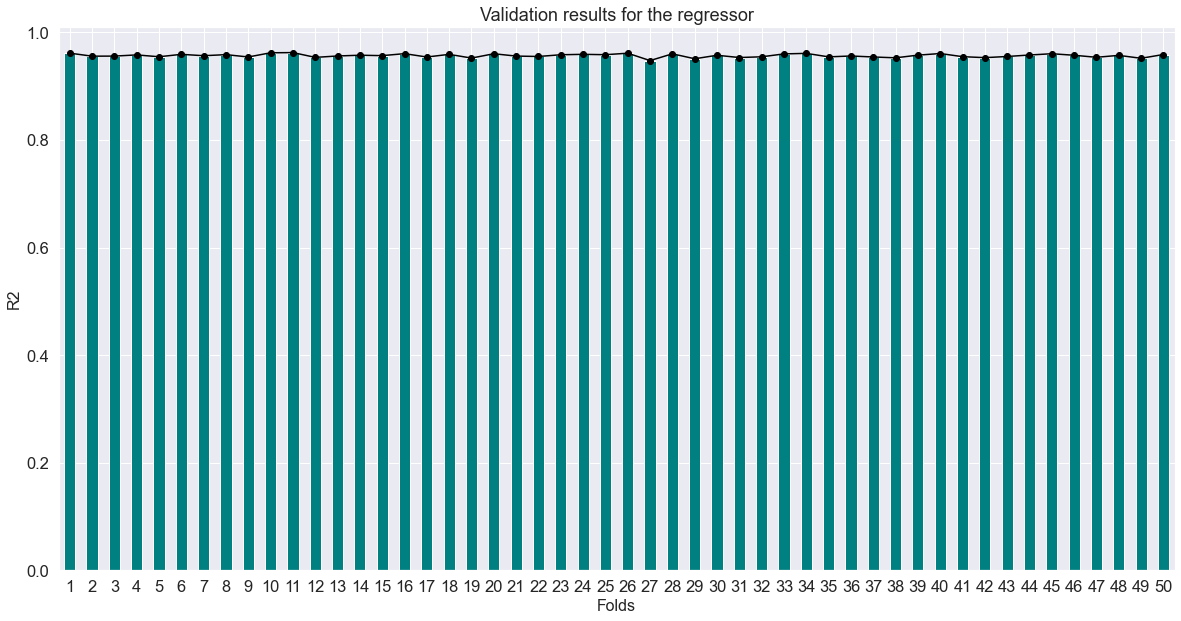

In [53]:
plt.figure(figsize = (20,10))
plt.plot(cross_validation,marker = 'o',color = 'black')
pd.Series(data = cross_validation).plot(kind = 'bar',color = 'teal')
plt.title(label  = 'Validation results for the regressor')
plt.xlabel(xlabel = 'Folds',fontsize = 16)
plt.ylabel(ylabel = 'R2', fontsize = 16)
plt.xticks(ticks = range(cross_validation.size),labels = range(1,cross_validation.size + 1),rotation = 0)
plt.show()

In [54]:
import pickle
with open('saved_model.pickle', 'wb') as pickled_file:
    pickle.dump(xgb_model, pickled_file)

In [55]:
predicted_data=pd.DataFrame(prediction ,columns=['Predicted'])

actual_data=pd.DataFrame(y_test)
actual_data=actual_data.rename(columns={'qiymet':'Actual_value'}).reset_index()['Actual_value']

compare_2_data=pd.concat([predicted_data,actual_data],axis=1)
compare_2_data.head(10)

,Predicted,Actual_value
0,5690.038086,7000
1,10582.937500,8500
2,12815.350586,12300
3,115325.085938,130900
4,56335.773438,58650
5,23133.591797,24500
6,22684.228516,27700
7,14246.912109,13600
8,24904.074219,25300
9,43364.632812,46495
